# REGRESSÃO LOGÍSTICA BINÁRIA COM VARIÁVEIS EXPLICATIVAS QUANTI E QUALIS

EXEMPLO 3

In [1]:
# Importação dos pacotes
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatística chi2
import plotly.graph_objects as go # gráficos 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score
                                                        #logístico multinomial
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_fidelidade = pd.read_csv('/home/usp_ds_analytics/logistic_models/data/dados_fidelidade.csv',delimiter=',')
df_fidelidade.head(10)

,id,fidelidade,sexo,idade,atendimento,sortimento,acessibilidade,preço
0,1,nao,feminino,34,2,2,1,1
1,2,nao,feminino,34,2,2,1,1
2,3,nao,masculino,34,3,2,4,2
3,4,nao,feminino,34,4,3,3,3
4,5,nao,feminino,34,4,3,1,4
5,6,nao,feminino,34,2,3,3,3
6,7,nao,feminino,34,5,1,4,2
7,8,nao,feminino,34,2,3,3,3
8,9,nao,feminino,34,4,3,3,3
9,10,nao,feminino,34,3,2,5,4


In [3]:
# Características das variáveis do dataset
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   int64 
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   int64 
 5   sortimento      3000 non-null   int64 
 6   acessibilidade  3000 non-null   int64 
 7   preço           3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


In [7]:
# Estatísticas univariadas
df_fidelidade.describe()

,id,idade,atendimento,sortimento,acessibilidade,preço
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,34.21000,3.490000,3.360000,3.330000,3.380000
std,866.169729,1.57058,0.964474,1.221023,1.296789,1.017814
min,1.000000,29.00000,1.000000,1.000000,1.000000,1.000000
25%,750.750000,34.00000,3.000000,2.750000,3.000000,3.000000
50%,1500.500000,34.00000,4.000000,4.000000,3.000000,3.000000
75%,2250.250000,34.00000,4.000000,4.000000,5.000000,4.000000
max,3000.000000,42.00000,5.000000,5.000000,5.000000,5.000000


In [9]:
# In[3.1]: Alteração dos tipos das variáveis não quantitativas no dataframe

# Transformação do 'id' para o tipo 'str'
df_fidelidade['id'] = df_fidelidade['id'].astype('str')

# Transformação das variáveis explicativas qualitativas para o tipo 'object'
df_fidelidade['atendimento'] = df_fidelidade['atendimento'].astype('object')
df_fidelidade['sortimento'] = df_fidelidade['sortimento'].astype('object')
df_fidelidade['acessibilidade'] = df_fidelidade['acessibilidade'].astype('object')
df_fidelidade['preço'] = df_fidelidade['preço'].astype('object')

In [10]:
# Características das variáveis do dataset
df_fidelidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   object
 1   fidelidade      3000 non-null   object
 2   sexo            3000 non-null   object
 3   idade           3000 non-null   int64 
 4   atendimento     3000 non-null   object
 5   sortimento      3000 non-null   object
 6   acessibilidade  3000 non-null   object
 7   preço           3000 non-null   object
dtypes: int64(1), object(7)
memory usage: 187.6+ KB


In [11]:
# Estatísticas univariadas
df_fidelidade.describe()

,idade
count,3000.00000
mean,34.21000
std,1.57058
min,29.00000
25%,34.00000
50%,34.00000
75%,34.00000
max,42.00000


### Tabela de frequências absolutas

In [13]:
# In[3.2]: Tabela de frequências absolutas das variáveis qualitativas referentes
#aos atributos da loja na percepção dos consumidores
df_fidelidade['fidelidade'].value_counts().sort_index()

fidelidade
nao    1320
sim    1680
Name: count, dtype: int64

Note que a variável Y 'fidelidade' está definida como objeto
> (PROBLEMA!!!)

In [14]:
df_fidelidade['sexo'].value_counts().sort_index()

sexo
feminino     2400
masculino     600
Name: count, dtype: int64

In [15]:
df_fidelidade['atendimento'].value_counts().sort_index()

atendimento
1     150
2     300
3     750
4    1530
5     270
Name: count, dtype: int64

In [16]:
df_fidelidade['sortimento'].value_counts().sort_index()

sortimento
1     330
2     420
3     570
4    1200
5     480
Name: count, dtype: int64

In [17]:
df_fidelidade['acessibilidade'].value_counts().sort_index()

acessibilidade
1     420
2      90
3    1410
4     240
5     840
Name: count, dtype: int64

In [18]:
df_fidelidade['preço'].value_counts().sort_index()

preço
1     180
2     270
3    1170
4     990
5     390
Name: count, dtype: int64

In [19]:
# Transformando a variável Y para 0 e 1 e para o tipo 'int' (poderia também
#ser do tipo 'float'), a fim de que seja possível estimar o modelo por meio
#da função 'sm.Logit.from_formula'
df_fidelidade.loc[df_fidelidade['fidelidade']=='sim', 'fidelidade'] = 1
df_fidelidade.loc[df_fidelidade['fidelidade']=='nao', 'fidelidade'] = 0

df_fidelidade['fidelidade'] = df_fidelidade['fidelidade'].astype('int64')

df_fidelidade.head()

,id,fidelidade,sexo,idade,atendimento,sortimento,acessibilidade,preço
0,1,0,feminino,34,2,2,1,1
1,2,0,feminino,34,2,2,1,1
2,3,0,masculino,34,3,2,4,2
3,4,0,feminino,34,4,3,3,3
4,5,0,feminino,34,4,3,1,4


### Dummizando as variáveis 'atendimento', 'sortimento', 'acessibilidade', 'preço' e 'sexo'. O código abaixo, automaticamente, fará:
- a) a dummização das variáveis originais;
- b) a remoção das variáveis dummizadas originais;
- c) a definição das categorias de label 1 de cada variável original como categorias de referência, por meio do argumento `drop_first=True`. A categoria de referência estará no alfa, ou seja, sexo de referência estará com quem deu nota de sortimento 1, acessibilidade 1, preço 1 e atendimento 1.

In [20]:
df_fidelidade_dummies = pd.get_dummies(df_fidelidade,
                                       columns=['atendimento',
                                                'sortimento',
                                                'acessibilidade',
                                                'preço',
                                                'sexo'],
                                       dtype=int,
                                       drop_first=True)

df_fidelidade_dummies.head()

,id,fidelidade,idade,atendimento_2,atendimento_3,atendimento_4,atendimento_5,sortimento_2,sortimento_3,sortimento_4,sortimento_5,acessibilidade_2,acessibilidade_3,acessibilidade_4,acessibilidade_5,preço_2,preço_3,preço_4,preço_5,sexo_masculino
0,1,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,34,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,34,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,4,0,34,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,0,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Estimação do modelo logístico binário

In [21]:
# Sugestão de uso neste caso, dada a existência de muitas dummies no dataframe
# Definição da fórmula utilizada no modelo
lista_colunas = list(df_fidelidade_dummies.drop(columns=['id',
                                                         'fidelidade']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "fidelidade ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

Fórmula utilizada:  fidelidade ~ idade + atendimento_2 + atendimento_3 + atendimento_4 + atendimento_5 + sortimento_2 + sortimento_3 + sortimento_4 + sortimento_5 + acessibilidade_2 + acessibilidade_3 + acessibilidade_4 + acessibilidade_5 + preço_2 + preço_3 + preço_4 + preço_5 + sexo_masculino


In [22]:
# Modelo propriamente dito
modelo_fidelidade = sm.Logit.from_formula(formula_dummies_modelo,
                                               df_fidelidade_dummies).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_fidelidade.summary()

Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fidelidade   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2981
Method:                           MLE   Df Model:                           18
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.6241
Time:                        16:32:03   Log-Likelihood:                -773.57
converged:                       True   LL-Null:                       -2057.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -68.9866      6.055    -11.394      0.000     -80.854     -57.120
idade                1.6870      0.176      9.561      0.000       1.341       2.033
atendimento_2        1.6808      0.336      5.004      0.000       1.023       2.339
atendimento_3        1.8172      0.342      5.321      0.000       1.148       2.487
atendimento_4        3.3168      0.311     10.651      0.000       2.706       3.927
atendimento_5        4.3119      0.432      9.977      0.000       3.465       5.159
sortimento_2         1.8503      0.396      4.671      0.000       1.074       2.627
sortimento_3         2.0511      0.321      6.389      0.000       1.422       2.680
sortimento_4         3.3290      0.320     10.388      0.000       2.701       3.957
sortimento_5         5.9365      0.402     14.755      0.000       5.148       6.725
acessibilidade_2     2.3475      0.446      5.258      0.000       1.473       3.223
acessibilidade_3     2.9229      0.281     10.404      0.000       2.372       3.474
acessibilidade_4     4.2907      2.123      2.021      0.043       0.130       8.451
acessibilidade_5     5.3662      0.376     14.260      0.000       4.629       6.104
preço_2              0.5706      2.122      0.269      0.788      -3.589       4.730
preço_3              2.9216      0.390      7.486      0.000       2.157       3.687
preço_4              3.0393      0.416      7.314      0.000       2.225       3.854
preço_5              3.9142      0.442      8.849      0.000       3.047       4.781
sexo_masculino       1.7695      0.197      8.962      0.000       1.383       2.157
====================================================================================
"""

Interessante como dentro do `atendimento` os betas vão crescendo.

O mesmo para `preço`. De outra maneira, talvez não seria possível identificar isso.

### Procedimento Stepwise

In [23]:
# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

#Estimação do modelo por meio do procedimento Stepwise
step_modelo_fidelidade = stepwise(modelo_fidelidade, pvalue_limit=0.05)


Regression type: Logit 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_2') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated successfully.
         Current function value: 0.257856
         Iterations 9

 Discarding atribute "Q('preço_2')" with p-value equal to 0.7880570577805387 

Estimating model...: 
 fidelidade ~ Q('idade') + Q('atendimento_2') + Q('atendimento_3') + Q('atendimento_4') + Q('atendimento_5') + Q('sortimento_2') + Q('sortimento_3') + Q('sortimento_4') + Q('sortimento_5') + Q('acessibilidade_2') + Q('acessibilidade_3') + Q('acessibilidade_4') + Q('acessibilidade_5') + Q('preço_3') + Q('preço_4') + Q('preço_5') + Q('sexo_masculino')
Optimization terminated succes

### Construção de função para a definição da matriz de confusão

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

### Construção da matriz de confusão

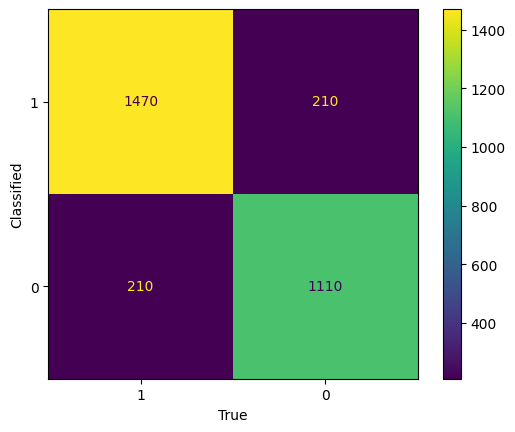

,Sensitividade,Especificidade,Acurácia
0,0.875,0.840909,0.86


In [25]:
# Adicionando os valores previstos de probabilidade na base de dados
df_fidelidade_dummies['phat'] = step_modelo_fidelidade.predict()

# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_fidelidade_dummies['fidelidade'],
                predicts=df_fidelidade_dummies['phat'],
                cutoff=0.50)

### Igualando critérios de especificidade e de sensitividade

In [26]:
# Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

# ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA o procedimento garante a maximização da acurácia do modelo!

# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [27]:
# In[3.10]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados

dados_plotagem = espec_sens(observado = df_fidelidade_dummies['fidelidade'],
                            predicts = df_fidelidade_dummies['phat'])
dados_plotagem.head()

,cutoffs,sensitividade,especificidade
0,0.00,1.0,0.000000
1,0.01,1.0,0.295455
2,0.02,1.0,0.318182
3,0.03,1.0,0.340909
4,0.04,1.0,0.386364


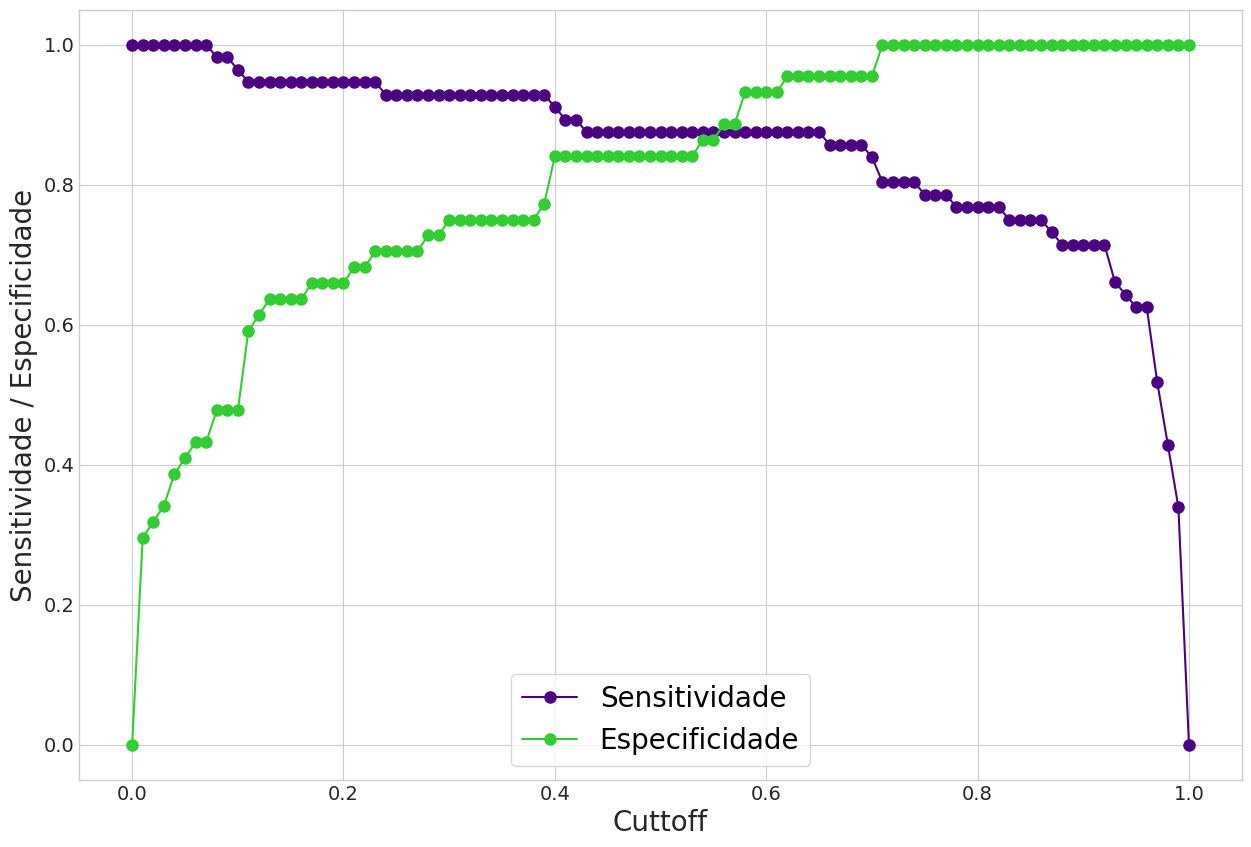

In [28]:
# In[3.11]: Plotagem de um gráfico que mostra a variação da especificidade e da
#sensitividade em função do cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=8)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cuttoff', fontsize=20)
plt.ylabel('Sensitividade / Especificidade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=20)
plt.show()

### Construção da curva ROC

In [29]:
# Função 'roc_curve' do pacote 'metrics' do sklearn
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds =roc_curve(df_fidelidade_dummies['fidelidade'],
                                df_fidelidade_dummies['phat'])
roc_auc = auc(fpr, tpr)

In [30]:
# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

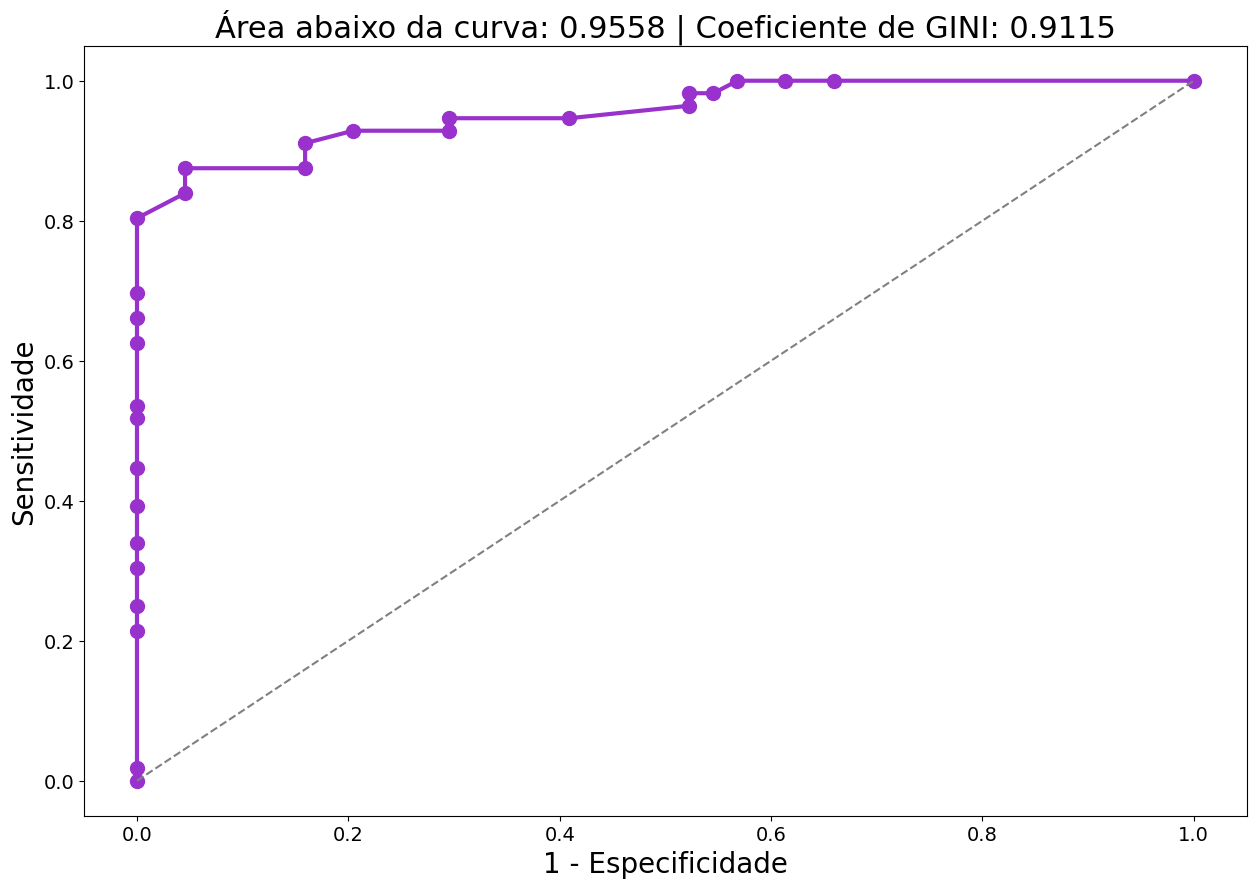

In [31]:
# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

### Modelo só com a variável preditora quanti `idade`, sem as dummies.
Para verificar a contribuição das dummies

In [32]:
modelo_idade = sm.Logit.from_formula('fidelidade ~ idade',
                                    df_fidelidade).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_idade.summary()

Optimization terminated successfully.
         Current function value: 0.564498
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fidelidade   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.1770
Time:                        16:41:49   Log-Likelihood:                -1693.5
converged:                       True   LL-Null:                       -2057.8
Covariance Type:            nonrobust   LLR p-value:                1.814e-160
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.9563      3.592    -15.299      0.000     -61.997     -47.916
idade          1.6183      0.105     15.360      0.000       1.412       1.825
==============================================================================
"""

In [33]:
modelo_idade.llf

np.float64(-1693.4941234593948)

In [34]:
df_fidelidade_dummies['phat2'] = modelo_idade.predict()

In [35]:
fpr2, tpr2, thresholds =roc_curve(df_fidelidade_dummies['fidelidade'],
                                df_fidelidade_dummies['phat2'])
roc_auc2 = auc(fpr2, tpr2)

In [36]:
# Cálculo do coeficiente de GINI
gini2 = (roc_auc2 - 0.5)/(0.5)

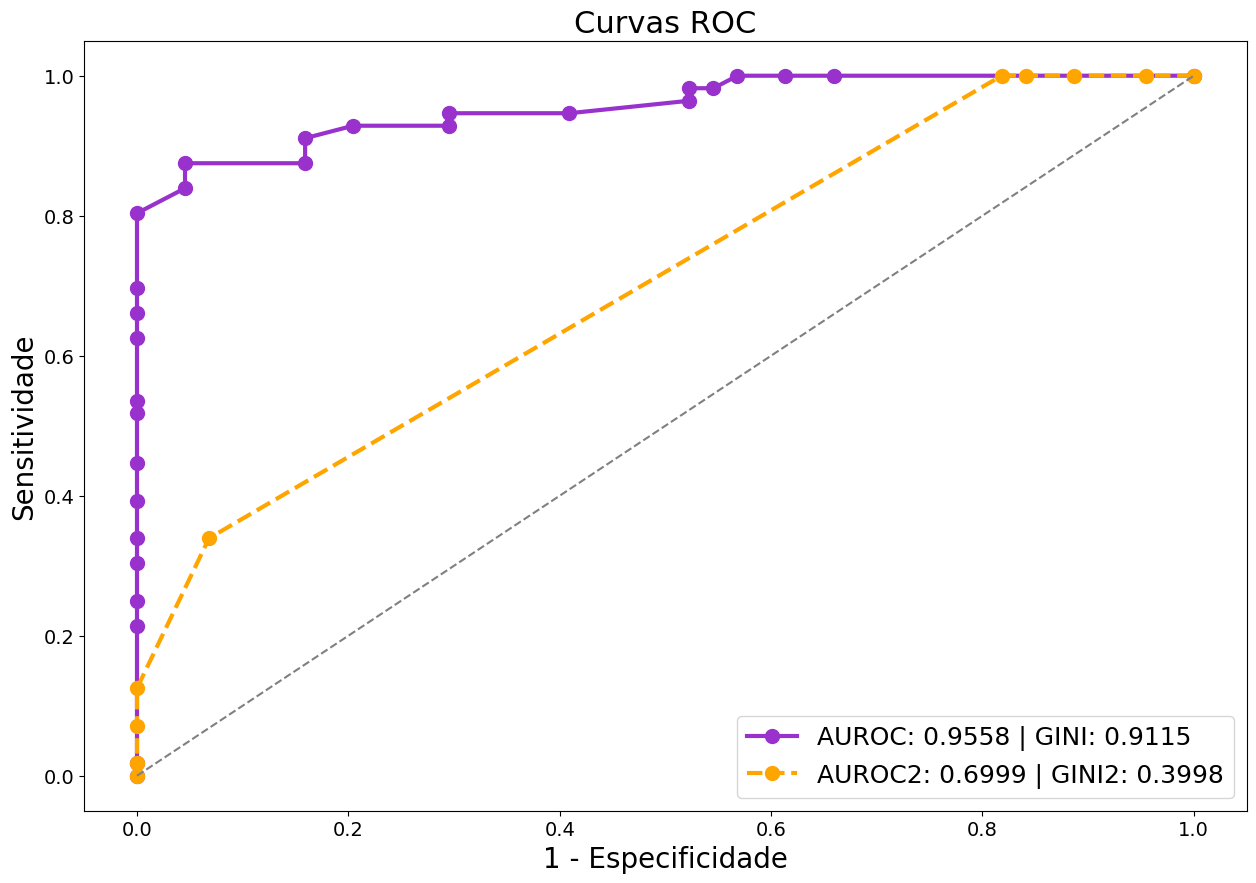

In [39]:
# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3,
         label=f'AUROC: {roc_auc:.4f} | GINI: {gini:.4f}')

plt.plot(fpr2, tpr2, marker='o', color='orange', markersize=10, linewidth=3,
         label=f'AUROC2: {roc_auc2:.4f} | GINI2: {gini2:.4f}',
         linestyle='dashed')

plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Curvas ROC', fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(fontsize=18)
plt.show()

Olha que interessante. Para esse fenômeno, as dummies realmente trazem um incremento para o modelo. Neste caso, não é o volume da base, mas as próprias preditoras dummies fazem uma baita diferença.